<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_10/04_Data_Collecting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
from io import BytesIO

# Excel 파일 URL
url = "https://github.com/microsoft/powerbi-desktop-samples/raw/main/AdventureWorks%20Sales%20Sample/AdventureWorks%20Sales.xlsx"

# GitHub에서 파일 다운로드
response = requests.get(url)
response.raise_for_status()

# 모든 시트 이름 가져오기
excel_file = pd.ExcelFile(BytesIO(response.content))
sheet_names = excel_file.sheet_names

print(sheet_names)

['Sales Order_data', 'Sales Territory_data', 'Sales_data', 'Reseller_data', 'Date_data', 'Product_data', 'Customer_data']


In [2]:
print("발견된 시트:")
for sheet in sheet_names:
    print(f"- {sheet}")

print("\n" + "="*50 + "\n")

발견된 시트:
- Sales Order_data
- Sales Territory_data
- Sales_data
- Reseller_data
- Date_data
- Product_data
- Customer_data




In [3]:
# 모든 시트 읽기
all_sheets = {}

for sheet_name in sheet_names:
    print(f"'{sheet_name}' 시트 읽는 중...")
    df = pd.read_excel(BytesIO(response.content), sheet_name=sheet_name)
    all_sheets[sheet_name] = df
    print(f"  - 행 개수: {len(df)}")
    print(f"  - 열 개수: {len(df.columns)}")
    print(f"  - 열 이름: {', '.join(df.columns.tolist())}\n")


'Sales Order_data' 시트 읽는 중...
  - 행 개수: 121253
  - 열 개수: 4
  - 열 이름: Channel, SalesOrderLineKey, Sales Order, Sales Order Line

'Sales Territory_data' 시트 읽는 중...
  - 행 개수: 11
  - 열 개수: 4
  - 열 이름: SalesTerritoryKey, Region, Country, Group

'Sales_data' 시트 읽는 중...
  - 행 개수: 121253
  - 열 개수: 15
  - 열 이름: SalesOrderLineKey, ResellerKey, CustomerKey, ProductKey, OrderDateKey, DueDateKey, ShipDateKey, SalesTerritoryKey, Order Quantity, Unit Price, Extended Amount, Unit Price Discount Pct, Product Standard Cost, Total Product Cost, Sales Amount

'Reseller_data' 시트 읽는 중...
  - 행 개수: 702
  - 열 개수: 8
  - 열 이름: ResellerKey, Reseller ID, Business Type, Reseller, City, State-Province, Country-Region, Postal Code

'Date_data' 시트 읽는 중...
  - 행 개수: 1461
  - 열 개수: 7
  - 열 이름: DateKey, Date, Fiscal Year, Fiscal Quarter, Month, Full Date, MonthKey

'Product_data' 시트 읽는 중...
  - 행 개수: 397
  - 열 개수: 9
  - 열 이름: ProductKey, SKU, Product, Standard Cost, Color, List Price, Model, Subcategory, Category

'Cust

In [4]:
# 각 시트의 처음 5개 행 출력 (예시)
print("="*50)
print("각 시트의 처음 5개 행:\n")

for sheet_name, df in all_sheets.items():
    print(f"\n{sheet_name} 시트:")
    print(df.head())
    print("-"*30)

각 시트의 처음 5개 행:


Sales Order_data 시트:
    Channel  SalesOrderLineKey Sales Order Sales Order Line
0  Reseller           43659001     SO43659      SO43659 - 1
1  Reseller           43659002     SO43659      SO43659 - 2
2  Reseller           43659003     SO43659      SO43659 - 3
3  Reseller           43659004     SO43659      SO43659 - 4
4  Reseller           43659005     SO43659      SO43659 - 5
------------------------------

Sales Territory_data 시트:
   SalesTerritoryKey     Region        Country          Group
0                  1  Northwest  United States  North America
1                  2  Northeast  United States  North America
2                  3    Central  United States  North America
3                  4  Southwest  United States  North America
4                  5  Southeast  United States  North America
------------------------------

Sales_data 시트:
   SalesOrderLineKey  ResellerKey  CustomerKey  ProductKey  OrderDateKey  \
0           43659001          676           -1    

In [5]:
import pandas as pd

# Excel 파일 URL
url = "https://github.com/microsoft/powerbi-desktop-samples/raw/main/AdventureWorks%20Sales%20Sample/AdventureWorks%20Sales.xlsx"

# 모든 시트를 한 번에 읽기
all_sheets = pd.read_excel(url, sheet_name=None)

# 시트 정보 출력
print("Excel 파일의 시트들:")
for sheet_name, df in all_sheets.items():
    print(f"\n{sheet_name}:")
    print(f"  - 크기: {df.shape}")
    print(f"  - 열: {df.columns.tolist()}")

Excel 파일의 시트들:

Sales Order_data:
  - 크기: (121253, 4)
  - 열: ['Channel', 'SalesOrderLineKey', 'Sales Order', 'Sales Order Line']

Sales Territory_data:
  - 크기: (11, 4)
  - 열: ['SalesTerritoryKey', 'Region', 'Country', 'Group']

Sales_data:
  - 크기: (121253, 15)
  - 열: ['SalesOrderLineKey', 'ResellerKey', 'CustomerKey', 'ProductKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey', 'SalesTerritoryKey', 'Order Quantity', 'Unit Price', 'Extended Amount', 'Unit Price Discount Pct', 'Product Standard Cost', 'Total Product Cost', 'Sales Amount']

Reseller_data:
  - 크기: (702, 8)
  - 열: ['ResellerKey', 'Reseller ID', 'Business Type', 'Reseller', 'City', 'State-Province', 'Country-Region', 'Postal Code']

Date_data:
  - 크기: (1461, 7)
  - 열: ['DateKey', 'Date', 'Fiscal Year', 'Fiscal Quarter', 'Month', 'Full Date', 'MonthKey']

Product_data:
  - 크기: (397, 9)
  - 열: ['ProductKey', 'SKU', 'Product', 'Standard Cost', 'Color', 'List Price', 'Model', 'Subcategory', 'Category']

Customer_data:
  - 크기: (184

In [6]:
all_sheets

{'Sales Order_data':          Channel  SalesOrderLineKey Sales Order Sales Order Line
 0       Reseller           43659001     SO43659      SO43659 - 1
 1       Reseller           43659002     SO43659      SO43659 - 2
 2       Reseller           43659003     SO43659      SO43659 - 3
 3       Reseller           43659004     SO43659      SO43659 - 4
 4       Reseller           43659005     SO43659      SO43659 - 5
 ...          ...                ...         ...              ...
 121248  Internet           75122001     SO75122      SO75122 - 1
 121249  Internet           75122002     SO75122      SO75122 - 2
 121250  Internet           75123001     SO75123      SO75123 - 1
 121251  Internet           75123002     SO75123      SO75123 - 2
 121252  Internet           75123003     SO75123      SO75123 - 3
 
 [121253 rows x 4 columns],
 'Sales Territory_data':     SalesTerritoryKey          Region         Country          Group
 0                   1       Northwest   United States  North Am

In [7]:
all_sheets.keys()

dict_keys(['Sales Order_data', 'Sales Territory_data', 'Sales_data', 'Reseller_data', 'Date_data', 'Product_data', 'Customer_data'])

In [8]:
Customer_data = all_sheets['Customer_data']
Customer_data.head()

,CustomerKey,Customer ID,Customer,City,State-Province,Country-Region,Postal Code
0,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable]
1,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700
2,11001,AW00011001,Eugene Huang,Seaford,Victoria,Australia,3198
3,11002,AW00011002,Ruben Torres,Hobart,Tasmania,Australia,7001
4,11003,AW00011003,Christy Zhu,North Ryde,New South Wales,Australia,2113


In [9]:
Sales_data = all_sheets['Sales_data']
Sales_data.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,2024.994,0,1898.0944,1898.0944,2024.994
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,6074.982,0,1898.0944,5694.2832,6074.982
2,43659003,676,-1,351,20170702,20170712,20170709.0,5,1,2024.994,2024.994,0,1898.0944,1898.0944,2024.994
3,43659004,676,-1,344,20170702,20170712,20170709.0,5,1,2039.994,2039.994,0,1912.1544,1912.1544,2039.994
4,43659005,676,-1,345,20170702,20170712,20170709.0,5,1,2039.994,2039.994,0,1912.1544,1912.1544,2039.994


## **[Scikit-Learn Sample Data 연습하기](https://github.com/ancestor9/AI-with-python/blob/main/seminar_note_0_0_load%20dataset.ipynb)**

In [10]:
# prompt: Sales_data, Customer_data의 컬럼별로 데이터형태, 고유값, 결측치 등을 데이터프레임으로 요약하여 볼 수있는

import pandas as pd
def summarize_dataframe(df):
    """
    데이터프레임의 컬럼별 데이터형태, 고유값 개수, 결측치 개수를 요약하는 함수.

    Args:
        df: 요약할 pandas DataFrame.

    Returns:
        pandas DataFrame: 요약 정보를 담은 DataFrame.
    """

    summary = pd.DataFrame(index=df.columns)
    summary['Data Type'] = df.dtypes
    summary['Unique Values'] = df.nunique()
    summary['Missing Values'] = df.isnull().sum()

    return summary

# Sales_data 요약
sales_summary = summarize_dataframe(Sales_data)
print("Sales_data 요약:")
sales_summary

Sales_data 요약:


,Data Type,Unique Values,Missing Values
SalesOrderLineKey,int64,121253,0
ResellerKey,int64,636,0
CustomerKey,int64,18485,0
ProductKey,int64,350,0
OrderDateKey,int64,1081,0
DueDateKey,int64,1081,0
ShipDateKey,float64,1074,2113
SalesTerritoryKey,int64,10,0
Order Quantity,int64,41,0
Unit Price,float64,275,0


In [11]:
# Customer_data 요약
customer_summary = summarize_dataframe(Customer_data)
print("Customer_data 요약:")
customer_summary

Customer_data 요약:


,Data Type,Unique Values,Missing Values
CustomerKey,int64,18485,0
Customer ID,object,18485,0
Customer,object,18401,0
City,object,270,0
State-Province,object,54,0
Country-Region,object,7,0
Postal Code,object,324,0


In [12]:
# prompt: Sales_data, Customer_data의 CustomerKey를 기준으로 두 데이터프레임을 합쳐주라

# CustomerKey를 기준으로 두 데이터프레임 병합
merged_data = pd.merge(Customer_data, Sales_data, on='CustomerKey', how='left')

# 병합된 데이터프레임 출력 (선택 사항)
merged_data

,CustomerKey,Customer ID,Customer,City,State-Province,Country-Region,Postal Code,SalesOrderLineKey,ResellerKey,ProductKey,...,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Extended Amount,Unit Price Discount Pct,Product Standard Cost,Total Product Cost,Sales Amount
0,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],43659001,676,349,...,20170712,20170709.0,5,1,2024.9940,2024.9940,0,1898.0944,1898.0944,2024.9940
1,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],43659002,676,350,...,20170712,20170709.0,5,3,2024.9940,6074.9820,0,1898.0944,5694.2832,6074.9820
2,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],43659003,676,351,...,20170712,20170709.0,5,1,2024.9940,2024.9940,0,1898.0944,1898.0944,2024.9940
3,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],43659004,676,344,...,20170712,20170709.0,5,1,2039.9940,2039.9940,0,1912.1544,1912.1544,2039.9940
4,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],43659005,676,345,...,20170712,20170709.0,5,1,2039.9940,2039.9940,0,1912.1544,1912.1544,2039.9940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121248,29480,AW00029480,Nina Raji,London,England,United Kingdom,SW19 3RU,62341004,-1,217,...,20191228,20191225.0,10,1,34.9900,34.9900,0,13.0863,13.0863,34.9900
121249,29480,AW00029480,Nina Raji,London,England,United Kingdom,SW19 3RU,62341005,-1,225,...,20191228,20191225.0,10,1,8.9900,8.9900,0,6.9223,6.9223,8.9900
121250,29481,AW00029481,Ivan Suri,Hof,Bayern,Germany,95010,45427001,-1,349,...,20180123,20180120.0,8,1,3374.9900,3374.9900,0,1898.0944,1898.0944,3374.9900
121251,29482,AW00029482,Clayton Zhang,Saint Ouen,Charente-Maritime,France,17490,49746001,-1,358,...,20190301,20190226.0,7,1,2049.0982,2049.0982,0,1105.8100,1105.8100,2049.0982


In [13]:
merged_data.columns

Index(['CustomerKey', 'Customer ID', 'Customer', 'City', 'State-Province',
       'Country-Region', 'Postal Code', 'SalesOrderLineKey', 'ResellerKey',
       'ProductKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey',
       'SalesTerritoryKey', 'Order Quantity', 'Unit Price', 'Extended Amount',
       'Unit Price Discount Pct', 'Product Standard Cost',
       'Total Product Cost', 'Sales Amount'],
      dtype='object')

In [14]:
merged_data[['CustomerKey', 'Customer', 'Order Quantity', 'Unit Price', 'Product Standard Cost',
       'Total Product Cost', 'Sales Amount', 'SalesTerritoryKey', 'SalesOrderLineKey', 'ResellerKey',
       'ProductKey', 'OrderDateKey',]]

,CustomerKey,Customer,Order Quantity,Unit Price,Product Standard Cost,Total Product Cost,Sales Amount,SalesTerritoryKey,SalesOrderLineKey,ResellerKey,ProductKey,OrderDateKey
0,-1,[Not Applicable],1,2024.9940,1898.0944,1898.0944,2024.9940,5,43659001,676,349,20170702
1,-1,[Not Applicable],3,2024.9940,1898.0944,5694.2832,6074.9820,5,43659002,676,350,20170702
2,-1,[Not Applicable],1,2024.9940,1898.0944,1898.0944,2024.9940,5,43659003,676,351,20170702
3,-1,[Not Applicable],1,2039.9940,1912.1544,1912.1544,2039.9940,5,43659004,676,344,20170702
4,-1,[Not Applicable],1,2039.9940,1912.1544,1912.1544,2039.9940,5,43659005,676,345,20170702
...,...,...,...,...,...,...,...,...,...,...,...,...
121248,29480,Nina Raji,1,34.9900,13.0863,13.0863,34.9900,10,62341004,-1,217,20191218
121249,29480,Nina Raji,1,8.9900,6.9223,6.9223,8.9900,10,62341005,-1,225,20191218
121250,29481,Ivan Suri,1,3374.9900,1898.0944,1898.0944,3374.9900,8,45427001,-1,349,20180113
121251,29482,Clayton Zhang,1,2049.0982,1105.8100,1105.8100,2049.0982,7,49746001,-1,358,20190219


In [15]:
df = merged_data[['CustomerKey', 'Customer', 'Order Quantity', 'Unit Price', 'Product Standard Cost',
       'Total Product Cost', 'Sales Amount', 'SalesTerritoryKey', 'SalesOrderLineKey', 'ResellerKey',
       'ProductKey', 'OrderDateKey',]]
df

,CustomerKey,Customer,Order Quantity,Unit Price,Product Standard Cost,Total Product Cost,Sales Amount,SalesTerritoryKey,SalesOrderLineKey,ResellerKey,ProductKey,OrderDateKey
0,-1,[Not Applicable],1,2024.9940,1898.0944,1898.0944,2024.9940,5,43659001,676,349,20170702
1,-1,[Not Applicable],3,2024.9940,1898.0944,5694.2832,6074.9820,5,43659002,676,350,20170702
2,-1,[Not Applicable],1,2024.9940,1898.0944,1898.0944,2024.9940,5,43659003,676,351,20170702
3,-1,[Not Applicable],1,2039.9940,1912.1544,1912.1544,2039.9940,5,43659004,676,344,20170702
4,-1,[Not Applicable],1,2039.9940,1912.1544,1912.1544,2039.9940,5,43659005,676,345,20170702
...,...,...,...,...,...,...,...,...,...,...,...,...
121248,29480,Nina Raji,1,34.9900,13.0863,13.0863,34.9900,10,62341004,-1,217,20191218
121249,29480,Nina Raji,1,8.9900,6.9223,6.9223,8.9900,10,62341005,-1,225,20191218
121250,29481,Ivan Suri,1,3374.9900,1898.0944,1898.0944,3374.9900,8,45427001,-1,349,20180113
121251,29482,Clayton Zhang,1,2049.0982,1105.8100,1105.8100,2049.0982,7,49746001,-1,358,20190219


In [16]:
# prompt: df의 컬럼의 값이 '-1' 이거나 '[Not Applicable]'이 있는 행을 모두 삭제하라

# '-1' 또는 '[Not Applicable]' 값을 가진 행 삭제
df = df[~df.isin(['-1', '[Not Applicable]']).any(axis=1)]
df

,CustomerKey,Customer,Order Quantity,Unit Price,Product Standard Cost,Total Product Cost,Sales Amount,SalesTerritoryKey,SalesOrderLineKey,ResellerKey,ProductKey,OrderDateKey
60855,11000,Jon Yang,1,3399.9900,1912.1544,1912.1544,3399.9900,9,43793001,-1,344,20170712
60856,11000,Jon Yang,1,2319.9900,1265.6195,1265.6195,2319.9900,9,51522001,-1,353,20190621
60857,11000,Jon Yang,1,21.9800,8.2205,8.2205,21.9800,9,51522002,-1,485,20190621
60858,11000,Jon Yang,1,2384.0700,1481.9379,1481.9379,2384.0700,9,57418001,-1,573,20191004
60859,11000,Jon Yang,1,28.9900,10.8423,10.8423,28.9900,9,57418002,-1,541,20191004
...,...,...,...,...,...,...,...,...,...,...,...,...
121248,29480,Nina Raji,1,34.9900,13.0863,13.0863,34.9900,10,62341004,-1,217,20191218
121249,29480,Nina Raji,1,8.9900,6.9223,6.9223,8.9900,10,62341005,-1,225,20191218
121250,29481,Ivan Suri,1,3374.9900,1898.0944,1898.0944,3374.9900,8,45427001,-1,349,20180113
121251,29482,Clayton Zhang,1,2049.0982,1105.8100,1105.8100,2049.0982,7,49746001,-1,358,20190219


In [17]:
# prompt: CustomerKey와 Customer 를 기준으로 가장 Sales Amount가 큰 10명을 추출해줘

import pandas as pd
# 'Sales Amount' 열을 숫자형으로 변환 (필요한 경우)
df['Sales Amount'] = pd.to_numeric(df['Sales Amount'], errors='coerce')

# CustomerKey와 Customer를 기준으로 Sales Amount의 합계 계산
top_customers = df.groupby(['CustomerKey', 'Customer'])['Sales Amount'].sum().reset_index()

# Sales Amount를 기준으로 내림차순 정렬 후 상위 10명 추출
top_10_customers = top_customers.sort_values(by='Sales Amount', ascending=False).head(10)

# 결과 출력
top_10_customers


<ipython-input-17-a764e92d27e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales Amount'] = pd.to_numeric(df['Sales Amount'], errors='coerce')


,CustomerKey,Customer,Sales Amount
1301,12301,Nichole Nara,13295.3800
1132,12132,Kaitlyn Henderson,13294.2700
1308,12308,Margaret He,13269.2700
1131,12131,Randall Dominguez,13265.9900
1300,12300,Adriana Gonzalez,13242.7000
1321,12321,Rosa Hu,13215.6500
1124,12124,Brandi Gill,13195.6400
1307,12307,Brad She,13173.1900
1296,12296,Francisco Sara,13164.6400
433,11433,Maurice Shan,12909.6682


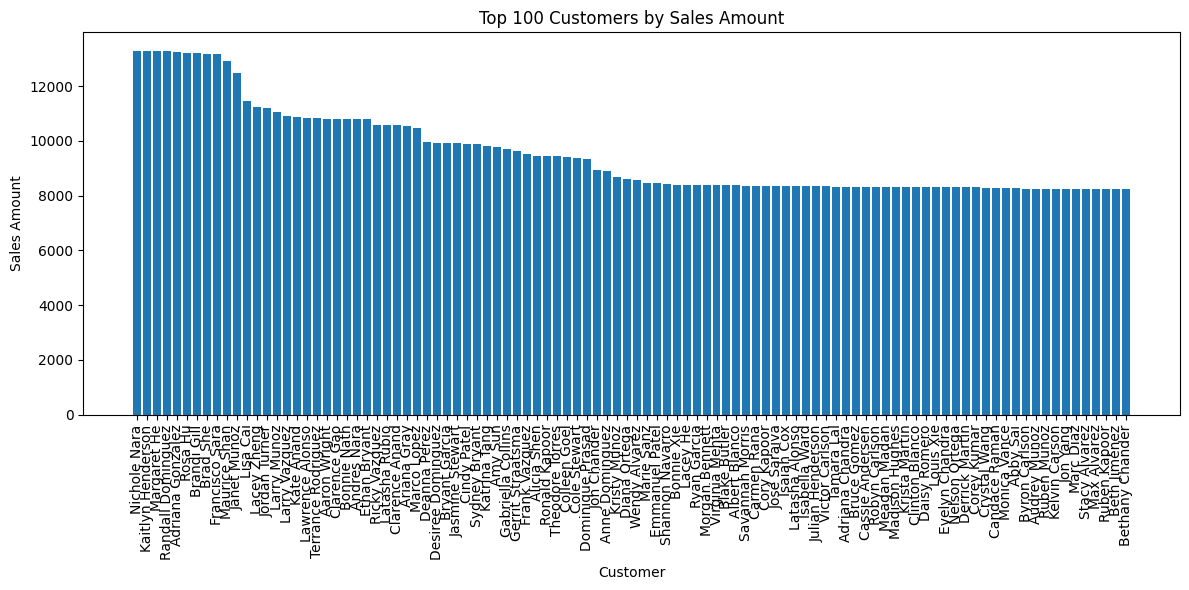

In [18]:
# prompt:  가장 Sales Amount가 큰 100명을 추출하고 막대그래프로 시각화 해줘

import matplotlib.pyplot as plt

# Sales Amount를 기준으로 내림차순 정렬 후 상위 100명 추출
top_100_customers = top_customers.sort_values(by='Sales Amount', ascending=False).head(100)

# 막대 그래프 생성
plt.figure(figsize=(12, 6))  # 그래프 크기 조절
plt.bar(top_100_customers['Customer'], top_100_customers['Sales Amount'])
plt.xlabel("Customer")
plt.ylabel("Sales Amount")
plt.title("Top 100 Customers by Sales Amount")
plt.xticks(rotation=90)  # x축 레이블 회전
plt.tight_layout()  # 레이블이 잘리는 현상 방지
plt.show()